<a href="https://colab.research.google.com/github/Upasana1503/Cryptonite_task/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score

In [260]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [261]:
df.drop(['PassengerId','Name'],axis=1,inplace=True)
df.shape

(891, 10)

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [263]:
df['cabins'] = df.Cabin.apply(lambda x: str(x)[0])
print(pd.pivot_table(df,index='Survived',columns='cabins',values='Ticket',aggfunc='count'))
df['cabins'].fillna('none',inplace=True)
df.drop(columns='Cabin',inplace=True)

cabins      A     B     C     D     E    F    G    T      n
Survived                                                   
0         8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1         7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


In [264]:
df['Age'] = df.Age.fillna(df.Age.median())
df.dropna(subset='Embarked',inplace=True)


In [265]:
num_cols = [col for col in df.columns if df[col].dtype!='O']
cat_cols = [col for col in df.columns if df[col].dtype=='O']

#len(num_cols),len(cat_cols)


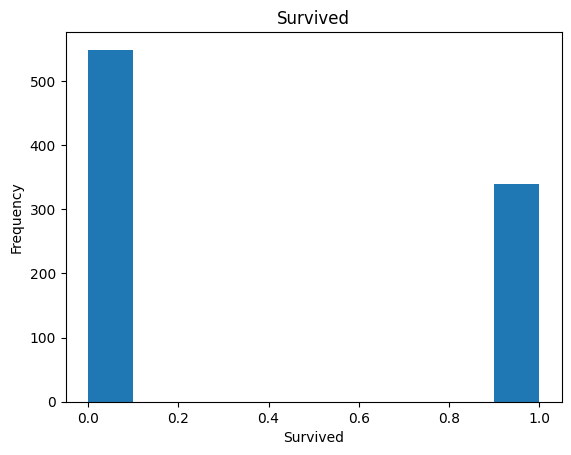

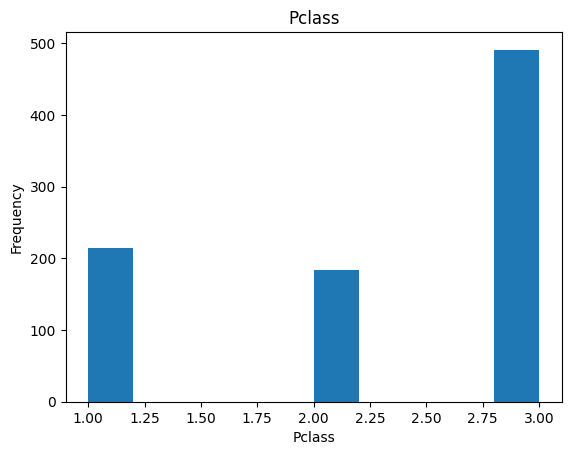

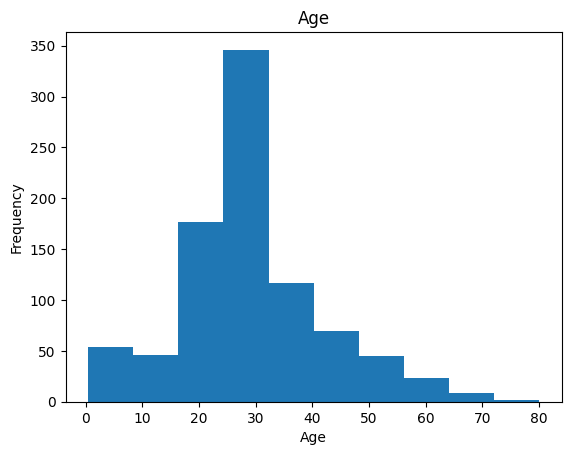

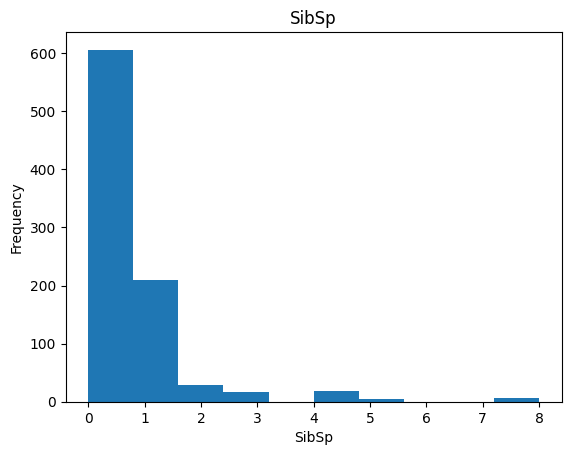

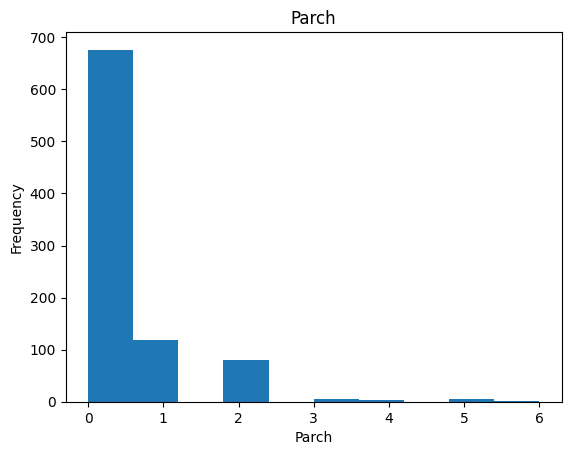

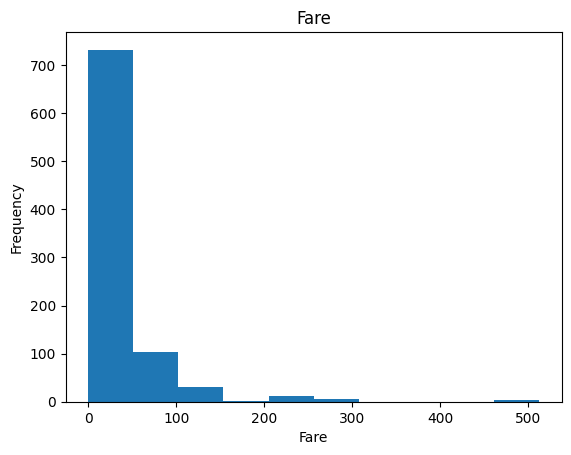

In [266]:
for col in num_cols:
  plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(col)
  plt.show()

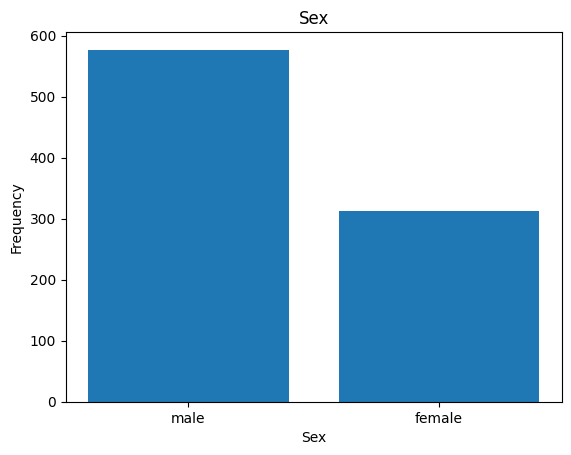

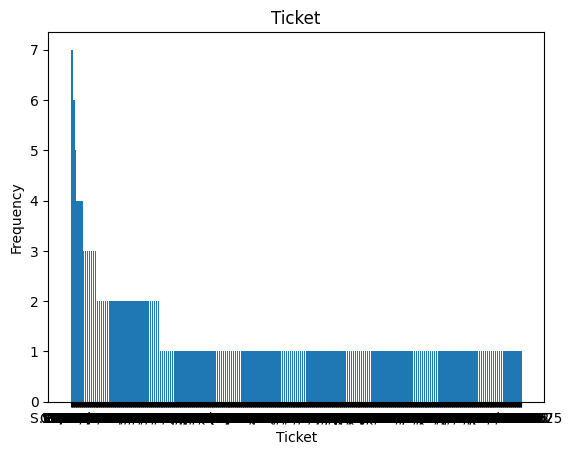

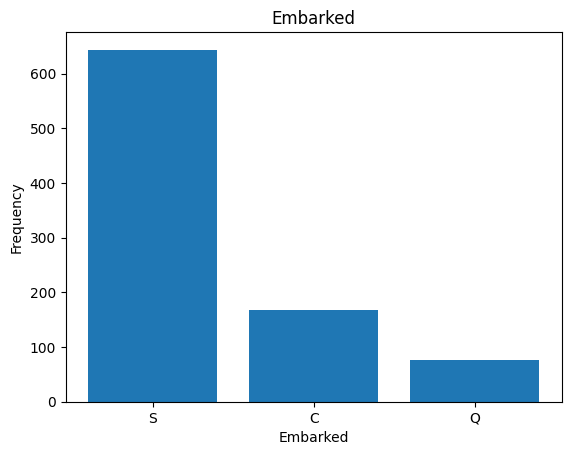

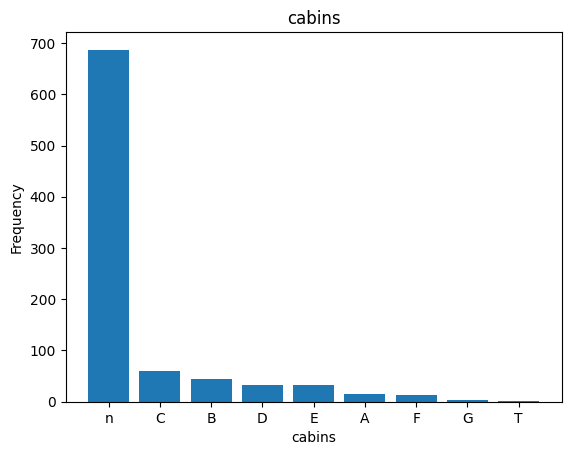

In [267]:
for col in cat_cols:
  plt.bar(df[col].value_counts().index,df[col].value_counts())
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

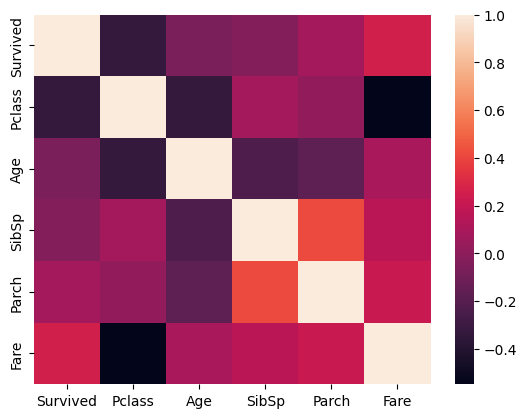

In [268]:
sns.heatmap(df[num_cols].corr());

In [269]:
print(pd.pivot_table(df,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print('\n',pd.pivot_table(df,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))
print('\n',pd.pivot_table(df,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))


Pclass      1   2    3
Survived              
0          80  97  372
1         134  87  119

 Sex       female  male
Survived              
0             81   468
1            231   109

 Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [270]:
#df['cabin'] = df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
#df.cabin.value_counts()

In [271]:
#pd.pivot_table(df,index='Survived',columns='cabin',values='Ticket',aggfunc='count')


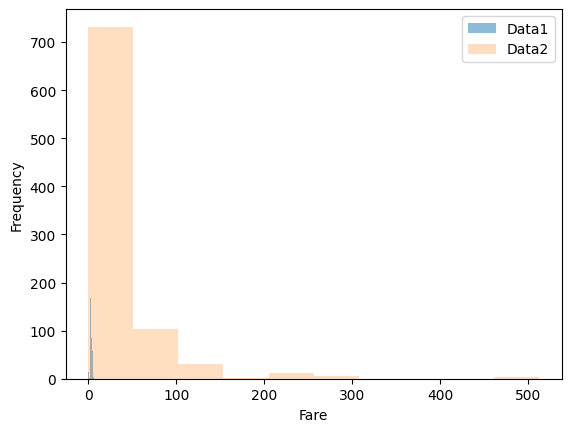

In [272]:
df['norm_Fare'] = np.log(df['Fare']+1)
plt.hist(df['norm_Fare'],label='Data1',alpha=0.5)
plt.hist(df['Fare'],label='Data2',alpha=0.25)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [273]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'cabins', 'norm_Fare'],
      dtype='object')

In [274]:
x = df[['Pclass', 'Sex', 'Age','SibSp','Parch', 'Ticket','Embarked', 'cabins', 'norm_Fare']].values
X = df[['Age','SibSp','Parch','norm_Fare']]
ohe = OneHotEncoder()
x = ohe.fit_transform(x).toarray()
scale = StandardScaler()
scaled_x = scale.fit_transform(X)
y = df.Survived.values

In [275]:
scaled_x,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)
lr = LogisticRegression(max_iter=5000)
lr.fit(scaled_x,y_train)

LogisticRegression(max_iter=5000)

In [276]:
cv = cross_val_score(lr,x,y,cv=5)
cv.mean()

0.8245435032347784

In [277]:
y_pred = lr.predict(x_test)
f1 = f1_score(y_test,y_pred)
print(f1)

0.7903225806451613
